# 3.9) Pandas: Descriptive Statistics

**Created by Vitor Kamada**

**Date:** 10/6/2019

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [3]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [4]:
df = sm.datasets.fair.load_pandas().data
df[0:7]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174


In [5]:
pd.set_option('precision', 2)
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00,6366.00
mean,4.11,29.08,9.01,1.40,2.43,14.21,3.42,3.85,0.71
std,0.96,6.85,7.28,1.43,0.88,2.18,0.94,1.35,2.20
min,1.00,17.50,0.50,0.00,1.00,9.00,1.00,1.00,0.00
25%,4.00,22.00,2.50,0.00,2.00,12.00,3.00,3.00,0.00
50%,4.00,27.00,6.00,1.00,2.00,14.00,3.00,4.00,0.00
75%,5.00,32.00,16.50,2.00,3.00,16.00,4.00,5.00,0.48
max,5.00,42.00,23.00,5.50,4.00,20.00,6.00,6.00,57.60


In [0]:
df['affair'] = (df['affairs'] > 0).astype(float)

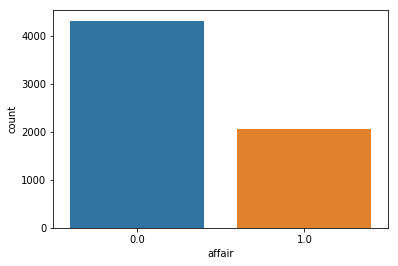

In [7]:
import seaborn as sns
sns.countplot(x='affair', data=df)

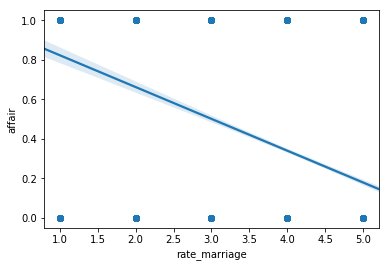

In [8]:
sns.regplot(y= 'affair', x='rate_marriage', data=df, ci=95)

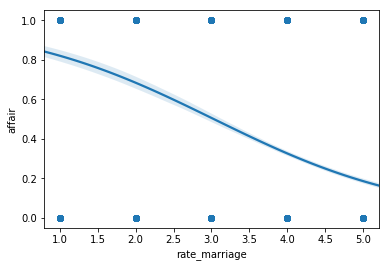

In [9]:
sns.regplot(y= 'affair', x='rate_marriage', data=df, ci=95, logistic=True)

In [10]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.82,13.91,2.31,2.34,13.85,3.23,3.84,1.20,0.75
2.0,30.47,10.73,1.74,2.33,13.86,3.33,3.76,1.62,0.64
3.0,30.01,10.24,1.64,2.31,14.00,3.40,3.80,1.37,0.55
4.0,28.86,8.82,1.37,2.40,14.14,3.42,3.84,0.67,0.32
5.0,28.57,8.31,1.25,2.51,14.40,3.45,3.89,0.35,0.18
